In [1]:
from ftx_utilities import *
from ftx_snap_basis import *
import seaborn as sns

In [43]:
symbol='1INCH-PERP'

In [77]:
fundings=from_parquet('temporary_parquets/allfundings.parquet').filter(like=symbol).iloc[:,0].sort_index(ascending=True)

In [49]:
future=from_parquet('temporary_parquets/'+symbol+'_futures.parquet').sort_index(ascending=True)
premium=(future[symbol+'/mark/c']/future[symbol+'/indexes/close']-1)*365*100

<AxesSubplot:>

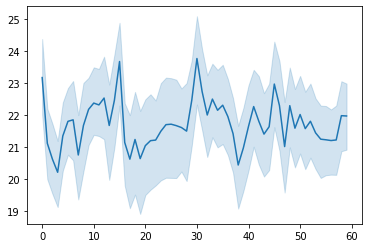

In [62]:
sns.lineplot(x=premium.index.minute,y=premium.values)

In [ ]:
twap= premium.rolling('1h').mean()/24
fundings - twap[fundings.index]

In [52]:
ewE=premium.ewm(times=oneinch.index,halflife=timedelta(days=2)).mean()
ewS=premium.ewm(times=oneinch.index,halflife=timedelta(days=2)).std()
ewZ=(premium-ewE)/ewS
#ewZ=ewZ.drop(index=ewZ.index[0])

ValueError: cannot reindex from a duplicate axis

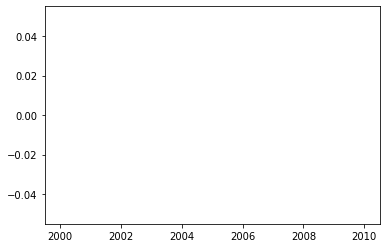

In [57]:
ewM=ewZ.rolling(window=timedelta(days=7)).max()
sns.lineplot(x=ewM.index,y=ewM)

<AxesSubplot:>

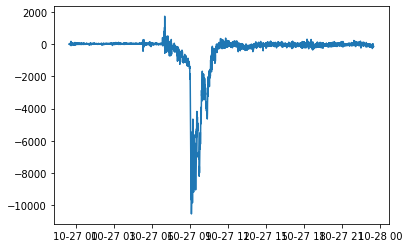

In [51]:
plotthat=premium
#plotthat=plotthat[plotthat.index.duplicated()==False]
last=plotthat[(plotthat.index>datetime.today()-timedelta(days=5))&(plotthat.index<datetime.today()-timedelta(days=4))]
sns.lineplot(x=last.index,y=last)

<AxesSubplot:ylabel='Count'>

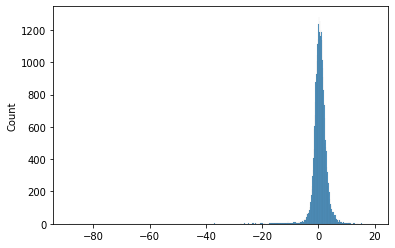

In [33]:
sns.histplot(last)